# **Financial Assistant**
## **Project desription**

This AI-powered financial assistant leverages LangChain’s tool-calling agent and OpenAI’s GPT-3.5 model to provide comprehensive analysis of the financial performance of SEC-listed companies. The application offers an intuitive interface built using Gradio, allowing users to interact with the chatbot to obtain insights on key financial metrics such as liquidity, solvency, profitability, and growth percentage.

With its advanced capabilities, the assistant can address a wide range of user queries related to company performance, while also offering visual analytics through interactive plots, making it a valuable tool for financial analysis and decision-making.

# **Financial Data Analysis**
In this analysis, the focus is on extracting, cleaning, and analyzing key financial data for Microsoft, Tesla, and Apple based on their 10-K filings from the SEC's EDGAR database. The primary aim is to extract essential financial metrics from the last five fiscal years, prepare the data for further use, and analyze the trends and financial performance of these companies. This comprehensive analysis will support the development of AI-powered financial chatbot that can assist users in understanding key financial trends and metrics for these companies.

The workflow of this analysis can be broken down into several key stages:

**Data Extraction**

**Data Cleaning and Processing**

**Financial Ratio Calculation and Analysis**

**Year-over-Year Analysis**


## **Data Extraction**

10 K filings from 2019 to 2023 of the following companies are extracted from SEC's EDGAR database.

[Microsoft](https://www.sec.gov/edgar/browse/?CIK=789019&owner=exclude)

[Tesla](https://www.sec.gov/edgar/browse/?CIK=1318605&owner=exclude)

[Apple](https://www.sec.gov/edgar/browse/?CIK=320193&owner=exclude)

##**Data Cleaning and Processing:**

Processed and filtered the financial data to keep the relevant rows (such as liabilities, assets, stockholder's equity, net income etc) and removed unnecessary information. Merged financial data from multiple files for each company into a single consolidated dataset. Formatted the date columns and sorted the financial data by year, providing a clear, structured view of financial trends over time.
Finally, the financial data from all the companies are combined into a single file for further analysis.



###** Data Cleaning and Preprocessing for Microsoft**

In [ ]:
import pandas as pd

In [ ]:
pip install openpyxl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
# Step 2: Define the base directory
base_dir = "/content/drive/MyDrive/financial_data"


# Step 1
Include the Balance sheets from all excel files and save into seperate CSV files for further processing.And set the first colum to 'Metric'

In [ ]:
import os
import pandas as pd

possible_sheet_names = ['BALANCE SHEETS']

for sub_folder in os.listdir(base_dir):
    sub_folder_path = os.path.join(base_dir, sub_folder)

    if sub_folder == "Microsoft" and os.path.isdir(sub_folder_path):
        #Iterate through each file in the subfolder
        print(f"Processing folder: {sub_folder}")
        for file in os.listdir(sub_folder_path):
            file_path = os.path.join(sub_folder_path, file)
            if file.endswith('.xlsx'):
                try:
                    xls = pd.ExcelFile(file_path, engine='openpyxl')
                except ValueError:
                    print(f"Skipping file {file} as its format could not be determined.")
                    continue

                # Find the matching sheet name from possible options
                df = None
                for sheet_name in possible_sheet_names:
                    if sheet_name in xls.sheet_names:
                        df = pd.read_excel(file_path, sheet_name=sheet_name, engine='openpyxl')
                        break

                if df is not None:
                    # Rename the first column to 'Metric'
                    df.rename(columns={df.columns[0]: 'Metric'}, inplace=True)

                    # Save DataFrame to a new CSV file
                    csv_file_path = os.path.splitext(file_path)[0] + "_balance_sheet.csv"
                    df.to_csv(csv_file_path, index=False)
                else:
                    print(f"No matching sheet found in file: {file_path}")

        print(f"Included only balance sheets for {sub_folder}")



Processing folder: Microsoft
Included only balance sheets for Microsoft


# Step2
Update the csv  files with the metrics of importance.


In [ ]:
import os
import pandas as pd

# Load the keywords from the text file (the keywords include Inventories, Total current assets, Total assets, Total current liabilities, Total liabilities, Total stockholders’ equity, Total revenues, Net income)
keywords_file_path = '/content/filter_data_microsoft.txt'
with open(keywords_file_path, 'r') as f:
    keywords = [line.strip() for line in f.readlines()]

for sub_folder in os.listdir(base_dir):
    sub_folder_path = os.path.join(base_dir, sub_folder)


    if sub_folder == "Microsoft" and os.path.isdir(sub_folder_path):
        print(f"Processing folder: {sub_folder}")

        #Iterate through each file in the subfolder
        for file in os.listdir(sub_folder_path):
            file_path = os.path.join(sub_folder_path, file)

            if file.endswith('_balance_sheet.csv'):
                # Load the CSV file into a DataFrame
                df = pd.read_csv(file_path)

                # Filter the rows that match the keywords in the first column
                filtered_df = df[df.iloc[:, 0].str.contains('|'.join(keywords), case=False, na=False)]


                # Save the filtered DataFrame back to a new CSV file
                filtered_csv_file_path = os.path.splitext(file_path)[0] + "_filtered.csv"
                filtered_df.to_csv(filtered_csv_file_path, index=False)

        print(f"Filtered balance sheets saved for {sub_folder}")






Processing folder: Microsoft
Filtered balance sheets saved for Microsoft


# `Step3`
Merge all the files into a single one

In [ ]:
import os
import pandas as pd

for sub_folder in os.listdir(base_dir):
    sub_folder_path = os.path.join(base_dir, sub_folder)

    if sub_folder == "Microsoft" and os.path.isdir(sub_folder_path):
        print(f"Processing folder: {sub_folder}")

        # Initialize the final DataFrame
        final_df = None

        for file in os.listdir(sub_folder_path):
            file_path = os.path.join(sub_folder_path, file)

            if file.endswith('_balance_sheet_filtered.csv'):
                try:
                    df = pd.read_csv(file_path)
                    # Merge with the final DataFrame based on the common column
                    if final_df is None:
                        final_df = df
                    else:
                        final_df = pd.merge(final_df, df, on='Metric', how='inner', suffixes=('', '_duplicate'))
                        # Drop duplicate columns after the merge
                        final_df = final_df.loc[:, ~final_df.columns.str.endswith('_duplicate')]

                except Exception as e:
                    print(f"Error merging file {file}: {e}")

        # Save the final merged DataFrame to a CSV file
        if final_df is not None:
            final_output_path = os.path.join(sub_folder_path, "merged_filtered_balance_sheets.csv")
            final_df.to_csv(final_output_path, index=False)
            print(f"Merged filtered CSV saved at: {final_output_path}")
        else:
            print("No filtered files found to merge.")


Processing folder: Microsoft
Merged filtered CSV saved at: /content/drive/MyDrive/financial_data/Microsoft/merged_filtered_balance_sheets.csv


# step4
Convert to datetime format. Arrange in sorted order

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/financial_data/Microsoft/merged_filtered_balance_sheets.csv')

In [ ]:
df.columns = pd.to_datetime(df.columns, errors='coerce')

<ipython-input-36-673e5f4530c2>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.columns = pd.to_datetime(df.columns, errors='coerce')


In [ ]:
df=df.dropna(axis=1, how='all')

In [ ]:
df = df.reindex(sorted(df.columns), axis=1)

In [ ]:
df=df.rename(columns={df.columns[0]: 'Metric'})

In [ ]:
df.to_csv('/content/drive/MyDrive/financial_data/Microsoft/final_balance_microsoft.csv', index=False)

# step5
Load the final CSV file and check the quality and make it ready for the model.

In [ ]:
df= pd.read_csv('/content/drive/MyDrive/financial_data/Microsoft/final_balance_microsoft.csv')

In [ ]:
df.columns = [col.split('-')[0] if '-' in col else col for col in df.columns]

In [ ]:
df.drop(df.columns[6], axis=1, inplace=True)

In [ ]:
df['Company_name'] = 'Microsoft'

In [ ]:
df.to_csv("/content/drive/MyDrive/financial_data/Microsoft/final_balance_microsoft.csv",index=False)

## Extract 'Net income' from Consolidated statements

# step 1
Include only the income sheets and save as CSV


In [ ]:
import os
import pandas as pd

possible_sheet_names = ['INCOME STATEMENTS']

for sub_folder in os.listdir(base_dir):
    sub_folder_path = os.path.join(base_dir, sub_folder)

    if sub_folder == "Microsoft" and os.path.isdir(sub_folder_path):
        print(f"Processing folder: {sub_folder}")
        for file in os.listdir(sub_folder_path):
            file_path = os.path.join(sub_folder_path, file)
            if file.endswith('.xlsx'):
                try:
                    xls = pd.ExcelFile(file_path, engine='openpyxl')
                except ValueError:
                    print(f"Skipping file {file} as its format could not be determined.")
                    continue

                # Find the matching sheet name from possible options
                df = None
                for sheet_name in possible_sheet_names:
                    if sheet_name in xls.sheet_names:
                        df = pd.read_excel(file_path, sheet_name=sheet_name, engine='openpyxl')
                        break

                if df is not None:

                    df.columns = df.iloc[0]  # Set the first row as header
                    df = df[1:].reset_index(drop=True)  # Remove the first row and reset index
                    df.rename(columns={df.columns[0]: 'Metric'}, inplace=True)
                    # Save the updated DataFrame to a CSV file
                    csv_file_path = os.path.splitext(file_path)[0] + "_income_sheet.csv"
                    df.to_csv(csv_file_path, index=False)
                    print(f"Income sheet saved as CSV for {file}")
                else:
                    print(f"No matching sheet found in file: {file_path}")

        print(f"Included only balance sheets for {sub_folder}")


Processing folder: Microsoft
Income sheet saved as CSV for jun_2024.xlsx
Income sheet saved as CSV for jun_2023.xlsx
Income sheet saved as CSV for jun_2022.xlsx
Income sheet saved as CSV for jun_2021.xlsx
Included only balance sheets for Microsoft


# step 2
Include only net income row



In [ ]:
import os
import pandas as pd

# Load the keywords from the text file
keywords_file_path = '/content/filter_data_microsoft.txt'
with open(keywords_file_path, 'r') as f:
    keywords = [line.strip() for line in f.readlines()]

for sub_folder in os.listdir(base_dir):
    sub_folder_path = os.path.join(base_dir, sub_folder)

    if sub_folder == "Microsoft" and os.path.isdir(sub_folder_path):
        print(f"Processing folder: {sub_folder}")

        for file in os.listdir(sub_folder_path):
            file_path = os.path.join(sub_folder_path, file)

            if file.endswith('_income_sheet.csv'):
                df = pd.read_csv(file_path)

                # Filter the rows that match the keywords in the first column
                filtered_df = df[df.iloc[:, 0].str.contains('|'.join(keywords), case=False, na=False)]

                # Save the filtered DataFrame back to a new CSV file
                filtered_csv_file_path = os.path.splitext(file_path)[0] + "_income_filtered.csv"
                filtered_df.to_csv(filtered_csv_file_path, index=False)

        print(f"Filtered income sheets saved for {sub_folder}")



Processing folder: Microsoft
Filtered income sheets saved for Microsoft


# step 3:
Merge all csv files


In [ ]:
import os
import pandas as pd

for sub_folder in os.listdir(base_dir):
    sub_folder_path = os.path.join(base_dir, sub_folder)

    if sub_folder == "Microsoft" and os.path.isdir(sub_folder_path):
        print(f"Processing folder: {sub_folder}")


        final_df = None
        for file in os.listdir(sub_folder_path):
          file_path = os.path.join(sub_folder_path, file)

          if file.endswith('_income_filtered.csv'):
            try:
            # Load the filtered CSV file into a DataFrame
              df = pd.read_csv(file_path)
              if final_df is None:
                final_df = df
              else:
                final_df = pd.merge(final_df, df, on='Metric', how='inner', suffixes=('', '_duplicate'))

                # Drop duplicate columns after the merge
                final_df = final_df.loc[:, ~final_df.columns.str.endswith('_duplicate')]

            except Exception as e:
              print(f"Error merging file {file}: {e}")

        # Save the final merged DataFrame to a CSV file
        if final_df is not None:
          final_output_path = os.path.join(sub_folder_path, "merged_filtered_income_sheets.csv")
          final_df.to_csv(final_output_path, index=False)
          print(f"Merged filtered CSV saved at: {final_output_path}")
        else:
          print("No filtered files found to merge.")

Processing folder: Microsoft
Merged filtered CSV saved at: /content/drive/MyDrive/financial_data/Microsoft/merged_filtered_income_sheets.csv


# Step 4
convert to datetime and merge

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/financial_data/Microsoft/merged_filtered_income_sheets.csv')

In [ ]:
df.columns=pd.to_datetime(df.columns, errors='coerce')

<ipython-input-39-080c0459bd87>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.columns=pd.to_datetime(df.columns, errors='coerce')


In [ ]:
df=df.dropna(axis=1, how='all')

In [ ]:
df=df.reindex(sorted(df.columns), axis=1)

In [ ]:
df=df.rename(columns={df.columns[0]: 'Metric'})

In [ ]:
df.to_csv("/content/drive/MyDrive/financial_data/Microsoft/final_income_microsoft.csv",index=False)

# Step5:
Read and make it ready for the model

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/financial_data/Microsoft/final_income_microsoft.csv')

In [ ]:
df.columns = [col.split('-')[0] if '-' in col else col for col in df.columns]

In [ ]:
df['Company_name'] = 'Microsoft'

In [ ]:
df.to_csv("/content/drive/MyDrive/financial_data/Microsoft/final_income_microsoft.csv",index=False)

Similarly the metrics of Tesla and Apple were extracted and saved into different CSV files. The next step is to combine all these files into a single one.

For data cleaning and preprocessing of Apple and Tesla, refer here:

[Data cleaning and preprocessing: Apple](https://colab.research.google.com/drive/1mZsc5z-9cIvvn4Lb0S_fAT8waaDLEESX?usp=sharing)

[Data cleaning and preprocessing: Tesla](https://colab.research.google.com/drive/19y0NJtG2s5VB6O0Z_ViVHDNHzBqWSWYQ?usp=sharing)

## **Combine all files into a single one for further analysis**

In [ ]:
import os
import pandas as pd


# Read each CSV file into a DataFrame
tesla_df = pd.read_csv("final_balance_tesla.csv")
microsoft_df = pd.read_csv('final_balance_microsoft.csv')
apple_df = pd.read_csv('final_balance_apple.csv')


# Append the DataFrames one by one
final_df1 = pd.concat([tesla_df, microsoft_df, apple_df], ignore_index=True)
final_df1.to_csv('final_balance_data.csv', index=False)

In [ ]:


# Read each CSV file into a DataFrame
tesla_df = pd.read_csv("final_income_tesla.csv")
microsoft_df = pd.read_csv('final_income_microsoft.csv')
apple_df = pd.read_csv('final_income_apple.csv')


# Append the DataFrames one by one
final_df2 = pd.concat([tesla_df, microsoft_df, apple_df], ignore_index=True)
final_df2.to_csv('final_income_data.csv', index=False)

In [ ]:
final_df = pd.concat([final_df1, final_df2], ignore_index=True)
final_df.to_csv('final_data.csv', index=False)

In [ ]:
final_df

,Metric,2019,2020,2021,2022,2023,Company_name
0,Inventories,3552.0,4101,5757,12839,13626,Tesla
1,Total current assets,12103.0,26717,27100,40917,49616,Tesla
2,Total assets,34309.0,52148,62131,82338,106618,Tesla
3,Total current liabilities,10667.0,14248,19705,26709,28748,Tesla
4,Total liabilities,26199.0,28418,30548,36440,43009,Tesla
5,Total stockholders' equity,6618.0,22225,30189,44704,62634,Tesla
6,Total liabilities and equity,34309.0,52148,62131,82338,106618,Tesla
7,Inventories,2063.0,1895,2636,3742,2500,Microsoft
8,Total current assets,175552.0,181915,184406,169684,184257,Microsoft
9,Total assets,286556.0,301311,333779,364840,411976,Microsoft


# **Financial Ratios Calculation**

The following financial ratios and metric are calculated for each of the companies and analysed.
1. Liquidity Ratios
2. Solvency Ratios
3. Profitability Ratios
4. Year-over-year change of netincome

# **Liquidity Ratios**

Liquidity ratios measure a company's ability to meet short-term obligations, assessing how easily a company can convert assets into cash to cover immediate liabilities. Key liquidity ratios include:

• **Current Ratio** = Current Assets / Current Liabilities
The current ratio indicates whether a company has enough resources to cover its short-term obligations with its short-term assets. A ratio greater than 1 generally signifies that the company is in a good position to meet its short-term liabilities, while a ratio below 1 may indicate potential liquidity issues.

• **Quick Ratio** (Acid-Test Ratio) = (Current Assets - Inventory) / Current Liabilities
The quick ratio is a more stringent test of liquidity compared to the current ratio. It measures a company's ability to pay its short-term liabilities without relying on the sale of inventory. A higher quick ratio suggests that the company can quickly meet its short-term obligations, whereas a lower ratio could indicate potential liquidity challenges.

# **Solvency Ratios**
Solvency ratios assess a company’s ability to meet its long-term financial obligations, providing insight into the long-term financial health of the company. These ratios help determine whether a company can sustain its operations and growth without excessive debt.

• **Debt to Equity Ratio** = Total Liabilities / Shareholders’ Equity
The debt to equity ratio measures the proportion of debt versus equity that a company is using to finance its assets.

• **Debt to Assets Ratio** = Total Liabilities / Total Assets
The debt to assets ratio shows what proportion of a company's assets is financed by debt.

# **Profitability Ratios**
Profitability ratios evaluate how effectively a company is generating profit from its assets and shareholders’ equity. These ratios are crucial for understanding a company’s ability to create value for investors.

**Return on Assets (ROA) = Net Income / Total Assets**
The return on assets ratio indicates how efficiently the company is using its assets to generate profits. It measures the company’s ability to turn investments in assets into net income. A higher ROA suggests effective use of assets to generate profit.

**Return on Equity (ROE) = Net Income / Shareholder’s Equity**
The return on equity ratio measures profitability relative to shareholders' equity, providing insight into how well the company is using shareholders' investments to generate profits.
# **Income Growth/Contraction Analysis**
This analysis focuses on evaluating the year-over-year growth or contraction in Net income for a given company, using the income data extracted from financial statements.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

class DataLoader:
    def __init__(self):
        self.final_data_path = '/content/final_data.csv'

    def load_data(self):
        try:
            df = pd.read_csv(self.final_data_path)
            return df
        except Exception as e:
            print(f"Error loading data: {e}")
            return None, None

class FinancialCalculator:
    def __init__(self,company_name):
        self.path_files = DataLoader()
        self.load_data(company_name)

    def load_data(self,company_name):
        # Load the data and initialize dataframes
        self.df = self.path_files.load_data()
        self.company_df = self.df[self.df['Company_name'] == company_name]
        # Convert relevant metrics to numeric
        self.extract_financial_metrics()

        self.income_pct_change = self.calculate_net_income_pct_change()
        self.ratios = self.calculate_ratios()

    def extract_financial_metrics(self):
        self.current_assets = self.extract_metric('Total current assets')
        self.current_liabilities = self.extract_metric('Total current liabilities')
        self.inventories = self.extract_metric('Inventories')
        self.total_assets = self.extract_metric('Total assets')
        self.stockholders_equity = self.extract_metric('Total stockholders\' equity')
        self.total_liabilities = self.extract_metric('Total liabilities')
        self.net_income = self.extract_metric('Net income')

    def extract_metric(self, metric_name):
    # Check if the metric exists in the dataframe
        metric_row = self.company_df[self.company_df['Metric'] == metric_name]

        if metric_row.empty:
          print(f"Metric '{metric_name}' not found for company.")
          return None  # Return None if the metric is not found

        # Extract the relevant data
        return pd.to_numeric(metric_row.iloc[0, 1:], errors='coerce')


    def calculate_ratios(self):
        # Calculate ratios
        self.current_ratio = self.current_assets / self.current_liabilities
        self.quick_ratio = (self.current_assets - self.inventories) / self.current_liabilities
        self.debt_equity_ratio = self.total_liabilities / self.stockholders_equity
        self.debt_assets_ratio = self.total_liabilities / self.total_assets
        self.return_assets = self.net_income / self.total_assets
        self.return_equity = self.net_income / self.stockholders_equity

        self.ratios = pd.DataFrame({
            'Current Ratio': self.current_ratio,
            'Quick Ratio': self.quick_ratio,
            'Debt to Equity Ratio': self.debt_equity_ratio,
            'Debt to Assets Ratio': self.debt_assets_ratio,
            'Return on Assets (ROA)': self.return_assets,
            'Return on Equity (ROE)': self.return_equity,
            'Income Growth' : self.income_pct_change
        })
        return self.ratios

    def calculate_net_income_pct_change(self):
        net_income_row = self.company_df[self.company_df['Metric'] == 'Net income']

        self.net_income = net_income_row.iloc[0, 1:-1]  # Exclude 'Metric' and 'Company_name'
        self.net_income = pd.to_numeric(self.net_income, errors='coerce')

        self.income_pct_change = self.net_income.pct_change() * 100  # Percentage change calculation
        return self.income_pct_change

def liquidity(company_name):
    """Provide liquidity trends and analysis for the given company(give the company name in Title Case)"""

    ratios= FinancialCalculator(company_name)
    liquidity_ratios = pd.DataFrame({
        'Current Ratio': ratios.current_ratio,
        'Quick Ratio': ratios.quick_ratio
    })

    return liquidity_ratios
def solvency(company_name):
    """Provide solvency trends and analysis for the given company(give the company name in Title Case)"""

    ratios= FinancialCalculator(company_name)
    solvency_ratios = pd.DataFrame({
        'Debt to Equity Ratio': ratios.debt_equity_ratio,
        'Debt to Assets Ratio': ratios.debt_assets_ratio
    })
    return solvency_ratios
def profitability(company_name):
    """Provide profitability trends and analysis for the given comapny(give the company name in Title Case)"""

    ratios= FinancialCalculator(company_name)
    profitability_ratios = pd.DataFrame({
        'Return on Assets (ROA)': ratios.return_assets,
        'Return on Equity (ROE)': ratios.return_equity
    })
    return profitability_ratios
def income_growth(company_name):
    """Provide revenue growth/contraction analysis for the given company(give the company name in Title Case) """
    metric= FinancialCalculator(company_name)

    return metric.income_pct_change

def generate_plot(plot_type,company_name):
    metrics=FinancialCalculator(company_name)
    plt.figure(figsize=(10, 6))

    if plot_type == "Liquidity Ratios":
        metrics.ratios[['Current Ratio', 'Quick Ratio']].plot(marker='o')
        plt.title('Liquidity Ratios Trend (Current & Quick Ratios)')
        plt.ylabel('Ratio')

    elif plot_type == "Solvency Ratios":
        metrics.ratios[['Debt to Equity Ratio', 'Debt to Assets Ratio']].plot(marker='o')
        plt.title('Solvency Ratios Trend (Debt to Equity Ratio)')
        plt.ylabel('Ratio')

    elif plot_type == "Profitability Ratios":
        metrics.ratios[['Return on Assets (ROA)','Return on Equity (ROE)']].plot(marker='o')
        plt.title('Profitability Ratios Trend')
        plt.ylabel('Ratio')

    elif plot_type == "Income Growth":
        metrics.income_pct_change.plot( marker='o')
        plt.title('Income Growth/Contraction')
        plt.ylabel('Growth')



    plt.xlabel("Years")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()

    return plt


## **Liquidity Ratios:**

In [ ]:
get_liq_ratios= liquidity("Microsoft")
print(get_liq_ratios)

              Current Ratio  Quick Ratio
2019               2.528839     2.499121
2020               2.515765     2.489559
2021               2.079994     2.050261
2022               1.784607     1.745251
2023               1.769167     1.745163
Company_name            NaN          NaN


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

<Figure size 1000x600 with 0 Axes>

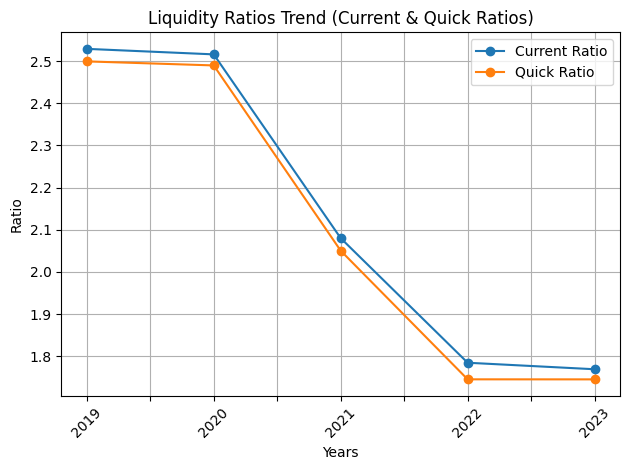

In [ ]:
generate_plot("Liquidity Ratios","Microsoft")

In [ ]:
get_liq_ratios= liquidity("Tesla")
print(get_liq_ratios)

              Current Ratio  Quick Ratio
2019               1.134621     0.801631
2020               1.875140     1.587310
2021               1.375285     1.083126
2022               1.531956     1.051256
2023               1.725894     1.251913
Company_name            NaN          NaN


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

<Figure size 1000x600 with 0 Axes>

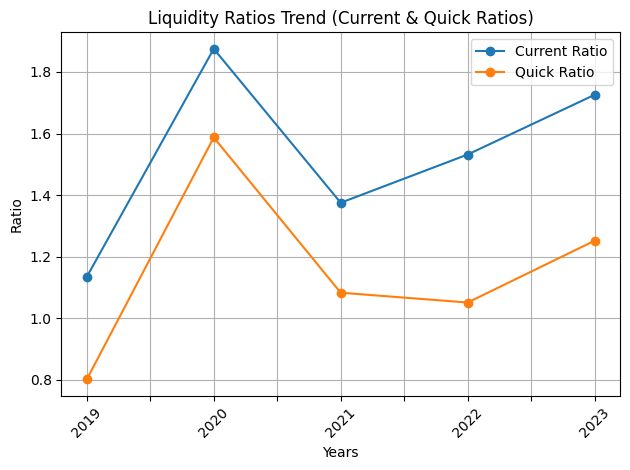

In [ ]:
generate_plot("Liquidity Ratios","Tesla")

In [ ]:
get_liq_ratios= liquidity("Apple")
print(get_liq_ratios)

              Current Ratio  Quick Ratio
2019               1.540126     1.501286
2020               1.363604     1.325072
2021               1.074553     1.022115
2022               0.879356     0.847235
2023               0.988012     0.944442
Company_name            NaN          NaN


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

<Figure size 1000x600 with 0 Axes>

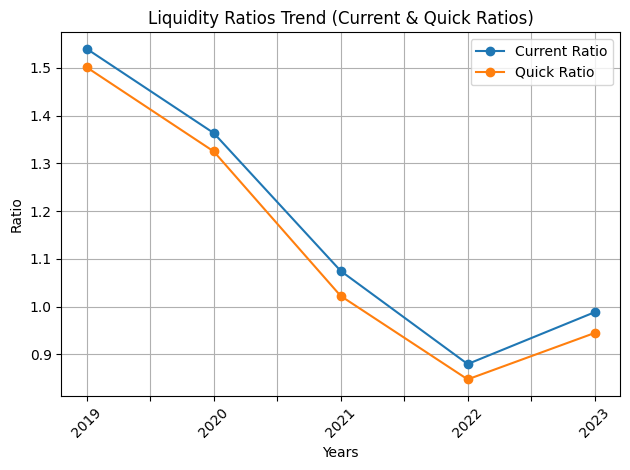

In [ ]:
generate_plot("Liquidity Ratios","Apple")

## **Solvency Ratios**


In [ ]:
get_sol_ratios= solvency("Microsoft")
print(get_sol_ratios)

              Debt to Equity Ratio  Debt to Assets Ratio
2019                      1.800313              0.642897
2020                      1.546921              0.607369
2021                      1.350755              0.574605
2022                      1.190679              0.543520
2023                      0.997721              0.499430
Company_name                   NaN                   NaN


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

<Figure size 1000x600 with 0 Axes>

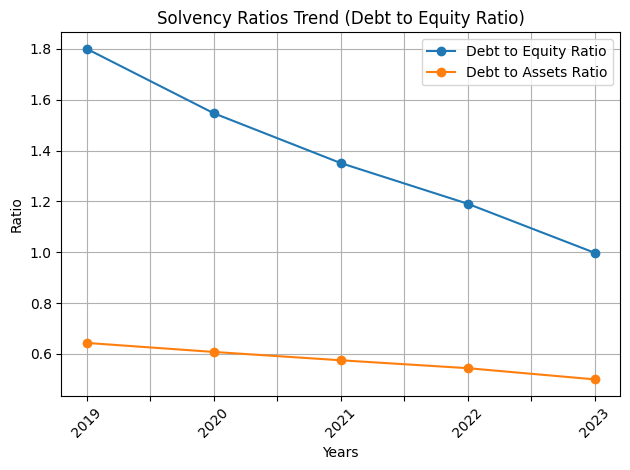

In [ ]:
generate_plot("Solvency Ratios","Microsoft")

In [ ]:
get_sol_ratios= solvency("Tesla")
print(get_sol_ratios)

              Debt to Equity Ratio  Debt to Assets Ratio
2019                      3.958749              0.763619
2020                      1.278650              0.544949
2021                      1.011892              0.491671
2022                      0.815140              0.442566
2023                      0.686672              0.403393
Company_name                   NaN                   NaN


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

<Figure size 1000x600 with 0 Axes>

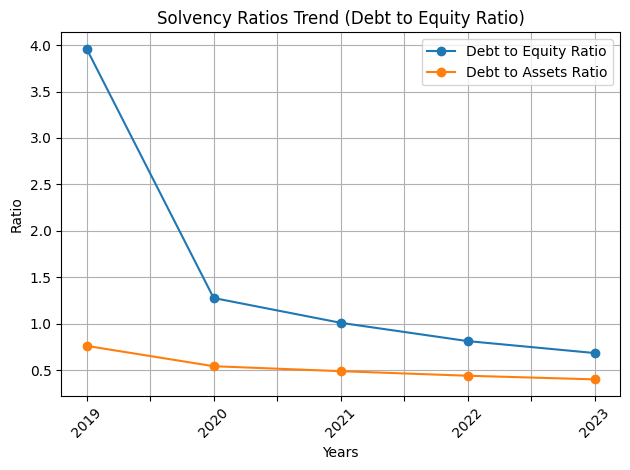

In [ ]:
generate_plot("Solvency Ratios","Tesla")

In [ ]:
get_sol_ratios= solvency("Apple")
print(get_sol_ratios)

              Debt to Equity Ratio  Debt to Assets Ratio
2019                      2.741004              0.732692
2020                      3.957039              0.798267
2021                      4.563512              0.820257
2022                      5.961537              0.856354
2023                      4.673462              0.823741
Company_name                   NaN                   NaN


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

<Figure size 1000x600 with 0 Axes>

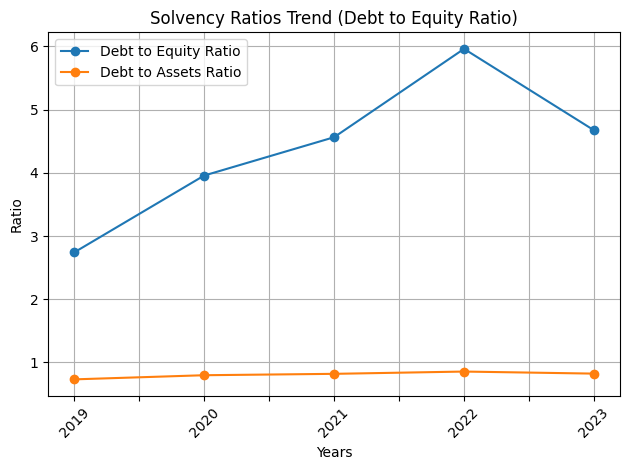

In [ ]:
generate_plot("Solvency Ratios","Apple")

## **Profitability Ratios**

In [ ]:
get_prof_ratios= profitability("Microsoft")
print(get_prof_ratios)

              Return on Assets (ROA)  Return on Equity (ROE)
2019                        0.136937                0.383465
2020                        0.146961                0.374298
2021                        0.183568                0.431522
2022                        0.199370                0.436755
2023                        0.175644                0.350887
Company_name                     NaN                     NaN


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

<Figure size 1000x600 with 0 Axes>

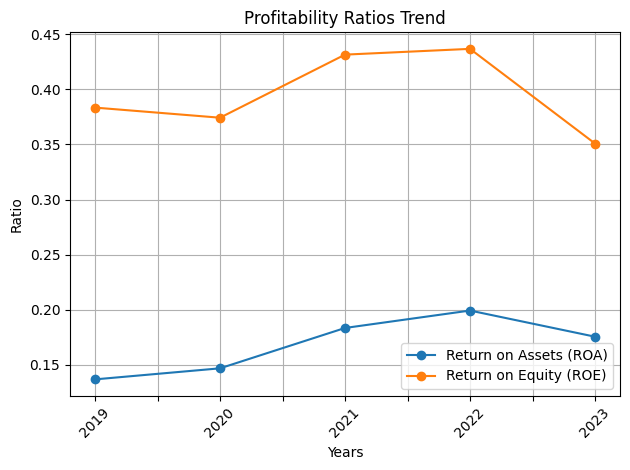

In [ ]:
generate_plot("Profitability Ratios","Microsoft")

In [ ]:
get_prof_ratios= profitability("Tesla")
print(get_prof_ratios)

              Return on Assets (ROA)  Return on Equity (ROE)
2019                       -0.022589               -0.117105
2020                        0.016530                0.038785
2021                        0.090840                0.186956
2022                        0.152870                0.281563
2023                        0.140445                0.239071
Company_name                     NaN                     NaN


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

<Figure size 1000x600 with 0 Axes>

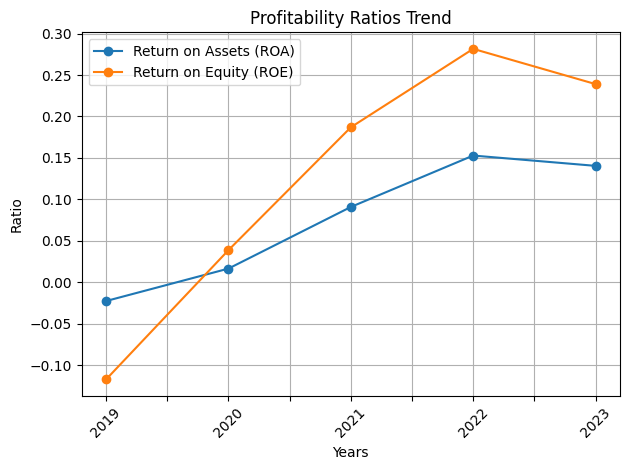

In [ ]:
generate_plot("Profitability Ratios","Tesla")

In [ ]:
get_prof_ratios= profitability("Apple")
print(get_prof_ratios)

              Return on Assets (ROA)  Return on Equity (ROE)
2019                        0.163230                0.610645
2020                        0.177256                0.878664
2021                        0.269742                1.500713
2022                        0.282924                1.969589
2023                        0.275098                1.560760
Company_name                     NaN                     NaN


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

<Figure size 1000x600 with 0 Axes>

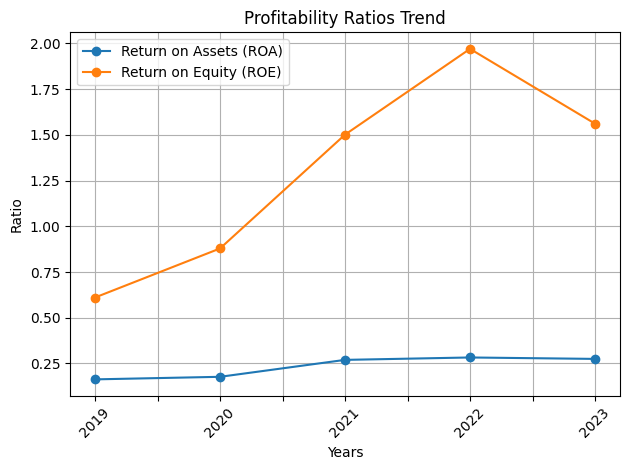

In [ ]:
generate_plot("Profitability Ratios","Apple")

## **Revenue Growth/Contraction Analysis**

In [ ]:
get_gr_ratios= income_growth("Microsoft")
print(get_gr_ratios)

2019          NaN
2020    12.846585
2021    38.368601
2022    18.715216
2023    -0.518299
Name: 1, dtype: float64


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

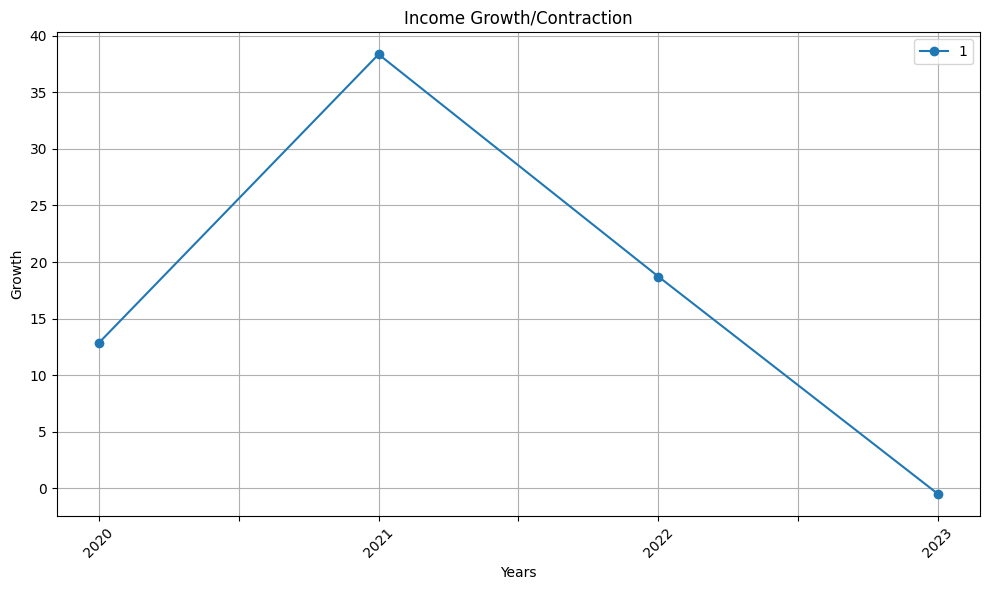

In [ ]:
generate_plot("Income Growth","Microsoft")

In [ ]:
get_gr_ratios= income_growth("Tesla")
print(get_gr_ratios)

2019           NaN
2020   -211.225806
2021    554.756381
2022    123.015592
2023     18.964010
Name: 0, dtype: float64


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

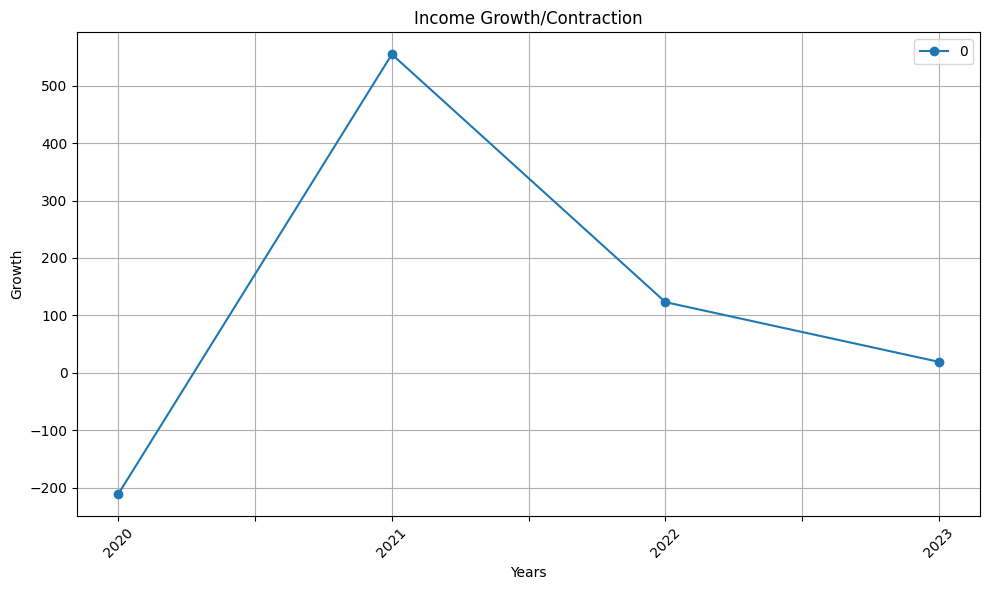

In [ ]:
generate_plot("Income Growth","Tesla")

In [ ]:
get_gr_ratios= income_growth("Apple")
print(get_gr_ratios)

2019          NaN
2020     3.900029
2021    64.916131
2022     5.410858
2023    -2.813543
Name: 2, dtype: float64


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

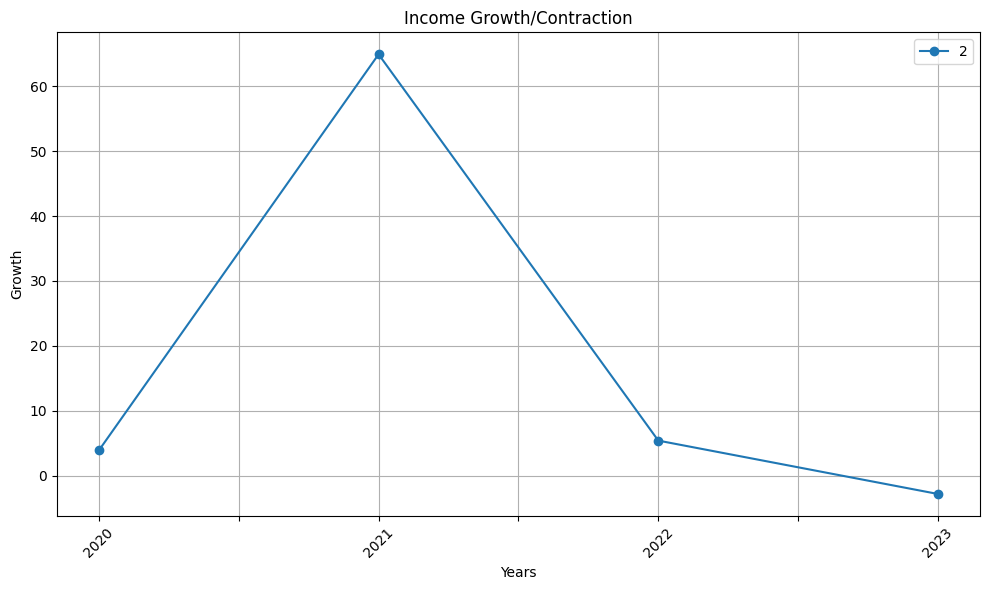

In [ ]:
generate_plot("Income Growth","Apple")

# Summary Insights from Financial Ratio Analysis (2019-2023)
## **Microsoft**
* While Microsoft still has a strong liquidity position, the gradual decline suggests the company might be managing its working capital more tightly or taking on additional short-term obligations.

* Microsoft’s solvency ratios reflect an increasingly conservative capital structure, with the company relying less on debt financing over time, making it less vulnerable to market volatility or financial downturns.

* Microsoft's profitability metrics reflect an efficient and profitable use of both assets and equity from 2019 to 2022. However, the 2023 dip suggests some underlying factors, such as rising costs or competitive pressures, that may have affected overall profitability.


* While Microsoft experienced robust income growth between 2020 and 2022, the slight decline in 2023 could indicate market challenges or increased operational costs that affected its bottom line. This may warrant a deeper investigation into the factors contributing to this contraction.

# **Tesla:**
* Tesla’s liquidity improved significantly over the five-year period, with the
company’s ability to meet short-term obligations becoming increasingly strong. The higher Current and Quick Ratios indicate a lower risk of financial distress in the near term.
* profitability improved dramatically during the analysis period, with ROA and ROE indicating efficient use of assets and shareholder equity to drive earnings. The drop in ROE in 2023 suggests a minor decline in profit growth but remains high compared to 2019.

* debt management has improved significantly, reducing its leverage over time. The steady reduction in both Debt to Equity and Debt to Assets ratios suggests the company has shifted toward a more equity-financed capital structure, decreasing its financial risk.
* Tesla experienced extraordinary growth between 2020 and 2022, fueled by increased vehicle production, technological advancements, and market demand. However, the lower growth rate in 2023 suggests Tesla may be entering a more stable, less aggressive growth phase.

 # **Apple**
* Apple's liquidity position has weakened over the five years, particularly from 2020 onwards, signaling a potential challenge in covering short-term liabilities with its current assets. This could be due to increased investments or short-term debt management strategies.

* Apple’s reliance on debt grew significantly, peaking in 2022, although it reduced slightly in 2023. While higher leverage can indicate confidence in growth opportunities, it also increases financial risk, particularly if liquidity declines.

* Apple’s profitability remained robust over the five-year period, with ROA and ROE demonstrating excellent returns on both assets and equity. The slight declines in 2023 reflect a maturing phase, but overall, the company remained highly profitable.

* Apple experienced impressive growth in 2021, driven by innovation and market expansion, but the momentum slowed significantly by 2022, with a contraction in 2023. This slowdown could signal that Apple is entering a more stable, mature growth phase.